## STOCK PRICE PREDICTION
## Steps
    > Importing Libraries

    > Read Data

    > Data Preprocessing
   
    > Feature Engineering

    > Model Training
## Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import joblib as jb
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import plot_tree
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from math import sqrt


In [2]:
# increase the default column
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

## Read data
    .Assuming the "Netflix Stock Price Prediction Dataset" is in CSV format, here's how the data might be represented:

In [3]:
df=pd.read_csv('D:/DS NOTE/PROJECT/files/train/raw/trian.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-15,283.820007,285.869995,279.399994,284.250000,284.250000,7685600
1,2020-07-30,480.709991,488.350006,477.510010,485.799988,485.799988,6608600
2,2021-03-31,515.669983,528.130005,515.440002,521.659973,521.659973,3503100
3,2020-04-15,413.000000,434.980011,412.250000,426.750000,426.750000,13561200
4,2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900
...,...,...,...,...,...,...,...
499,2020-01-27,345.950012,351.899994,341.019989,342.880005,342.880005,7709500
500,2018-03-13,323.869995,325.839996,313.279999,315.880005,315.880005,12917200
501,2020-02-11,373.750000,378.109985,369.720001,373.690002,373.690002,4772900
502,2019-11-06,288.190002,290.559998,285.839996,288.589996,288.589996,3438300


## Data Preprocessing
   

In [4]:
# Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       504 non-null    object 
 1   Open       504 non-null    float64
 2   High       504 non-null    float64
 3   Low        504 non-null    float64
 4   Close      504 non-null    float64
 5   Adj Close  504 non-null    float64
 6   Volume     504 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 27.7+ KB


    *In this dataframe  date column ,we cannot encode this Categorical to numerical  the colum date is in object datatype        format , so we have to change  datetime concept as int


In [5]:
# Convert argument to datetime
df['Date'] = pd.to_datetime(df['Date'])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-15,283.820007,285.869995,279.399994,284.250000,284.250000,7685600
1,2020-07-30,480.709991,488.350006,477.510010,485.799988,485.799988,6608600
2,2021-03-31,515.669983,528.130005,515.440002,521.659973,521.659973,3503100
3,2020-04-15,413.000000,434.980011,412.250000,426.750000,426.750000,13561200
4,2020-10-22,494.690002,495.140015,482.000000,485.230011,485.230011,6997900
...,...,...,...,...,...,...,...
499,2020-01-27,345.950012,351.899994,341.019989,342.880005,342.880005,7709500
500,2018-03-13,323.869995,325.839996,313.279999,315.880005,315.880005,12917200
501,2020-02-11,373.750000,378.109985,369.720001,373.690002,373.690002,4772900
502,2019-11-06,288.190002,290.559998,285.839996,288.589996,288.589996,3438300


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       504 non-null    datetime64[ns]
 1   Open       504 non-null    float64       
 2   High       504 non-null    float64       
 3   Low        504 non-null    float64       
 4   Close      504 non-null    float64       
 5   Adj Close  504 non-null    float64       
 6   Volume     504 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 27.7 KB


In [7]:
df['Year'] =df['Date'].dt.year
df['Month'] =df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df=df.drop(['Date','Adj Close'],axis=1).copy()

In [8]:
# Print a concise summary of a DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    504 non-null    float64
 1   High    504 non-null    float64
 2   Low     504 non-null    float64
 3   Close   504 non-null    float64
 4   Volume  504 non-null    int64  
 5   Year    504 non-null    int32  
 6   Month   504 non-null    int32  
 7   Day     504 non-null    int32  
dtypes: float64(4), int32(3), int64(1)
memory usage: 25.7 KB


In [9]:
# Generate descriptive statistics.
df.describe(include='all')

,Open,High,Low,Close,Volume,Year,Month,Day
count,504.000000,504.000000,504.000000,504.000000,5.040000e+02,504.000000,504.000000,504.000000
mean,413.680139,419.892003,406.974167,413.399424,7.744959e+06,2019.567460,6.527778,15.426587
std,105.938137,107.008928,105.182271,106.058069,5.270661e+06,1.143489,3.363236,8.732299
min,242.000000,250.649994,233.679993,233.880005,1.144000e+06,2018.000000,1.000000,1.000000
25%,329.187508,333.735008,320.992492,327.239998,4.100275e+06,2019.000000,4.000000,8.000000
50%,375.010010,378.695007,368.880005,372.529999,6.281900e+06,2020.000000,7.000000,15.000000
75%,505.249992,512.992493,498.602509,505.629990,9.531000e+06,2021.000000,10.000000,23.000000
max,691.609985,691.739990,679.739990,690.309998,3.386650e+07,2022.000000,12.000000,31.000000


In [10]:
#Count number of distinct elements in specified axis.
df.nunique()

Open      492
High      497
Low       501
Close     495
Volume    503
Year        5
Month      12
Day        31
dtype: int64

In [11]:
# Detect missing values.there is no null value 
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Year      0
Month     0
Day       0
dtype: int64

In [12]:
#Return boolean Series denoting duplicate rows.there is no duplicate in dataframe 
df.duplicated().sum()

0

    .Duplicates  - Repated entry / contain same value or record 
    .Why we have to remove -.same data records can be seen in both train and test dataset result in data leakage                    .so we have to remove the duplicate 

In [13]:
#Return a tuple representing the dimensionality of the DataFrame.
df.shape

(504, 8)

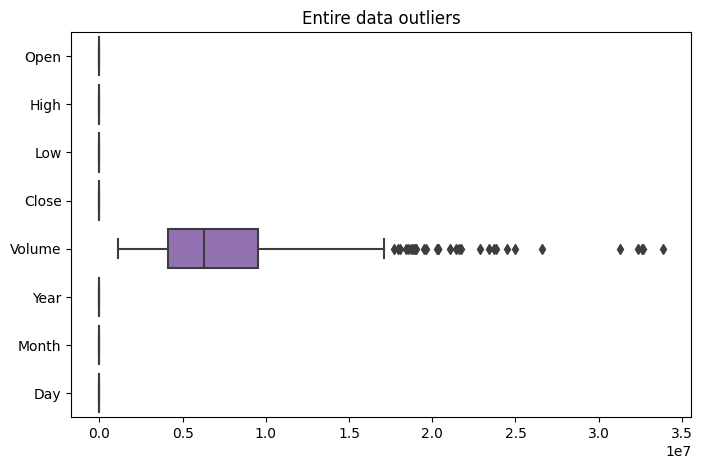

In [14]:
# Outliers 
plt.figure(figsize=(8 ,5))
sns.boxplot(df,orient='h')
plt.title('Entire data outliers')
plt.show()

    .Impact on Model Performance: Many machine learning algorithms, such as linear regression and K-means clustering, are   .sensitive to outliers. Outliers can introduce noise and affect the model's fitting process, resulting in suboptimal          performance.



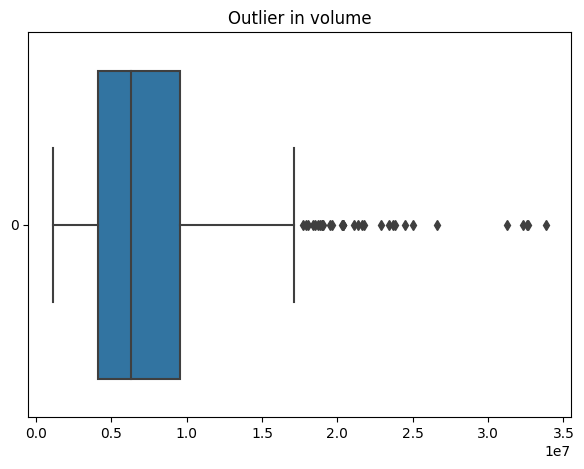

In [15]:
# we have a outlier in specific column in data that is volume so we have trimming or caping the data by IQR method
plt.figure(figsize=(7,5))
sns.boxplot(df['Volume'],orient='h')
plt.title('Outlier in volume')
plt.show()

In [16]:
# IQR method
df['Volume'].describe()


count    5.040000e+02
mean     7.744959e+06
std      5.270661e+06
min      1.144000e+06
25%      4.100275e+06
50%      6.281900e+06
75%      9.531000e+06
max      3.386650e+07
Name: Volume, dtype: float64

In [17]:
q1=df['Volume'].quantile(0.25)
q3=df['Volume'].quantile(0.75)
IQR=q3-q1
lower_range=q1-1.5*IQR
upper_range=q3+IQR 

print(f"q1 = {q1}\nq3 = {q3}\nIQR = {IQR}\nlower_range = {lower_range}\nupper_range = {upper_range}")

q1 = 4100275.0
q3 = 9531000.0
IQR = 5430725.0
lower_range = -4045812.5
upper_range = 14961725.0


In [18]:
    df['Volume']=np.where(df['Volume']<lower_range,lower_range,
                          np.where(df['Volume']>upper_range,upper_range,
                          df['Volume']))
    df['Volume']

0       7685600.0
1       6608600.0
2       3503100.0
3      13561200.0
4       6997900.0
          ...    
499     7709500.0
500    12917200.0
501     4772900.0
502     3438300.0
503    11679500.0
Name: Volume, Length: 504, dtype: float64

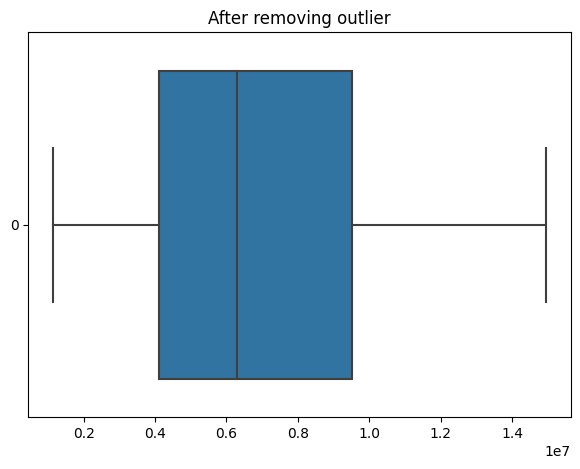

In [19]:
# After removing outlier data plot 
plt.figure(figsize=(7,5))
sns.boxplot(df['Volume'],orient='h')
plt.title('After removing outlier')
plt.show()

## Feature Engineering
    *.Feature Scaling* is a technique to standardize the independent features present in the data in a fixed range. It is          performed during the data pre-processing

In [20]:
#date is a non numeric column so we take out from fit process and again concat the data clomn
# Minmaxscaler
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
numeric_data = df[numeric_columns]
#Fit 
min_scaler = MinMaxScaler()
min_scaled_data = min_scaler.fit(numeric_data)
jb.dump(min_scaled_data,'D:/DS NOTE/PROJECT/files/train/model/train_min_scaled_model.pkl')


['D:/DS NOTE/PROJECT/files/train/model/train_min_scaled_model.pkl']

In [21]:
#Transform and concat the non- numerical column date
min_scaled_data = min_scaler.transform(numeric_data)
min_scaled_data_df = pd.DataFrame(min_scaled_data, columns=numeric_columns)
min_scaled_data_df_with_date = pd.concat([df[['Year','Month','Day']], min_scaled_data_df], axis=1)
min_scaled_data_df_with_date

,Year,Month,Day,Open,High,Low,Close,Volume
0,2019,10,15,0.093014,0.079848,0.102497,0.110356,0.473421
1,2020,7,30,0.530927,0.538892,0.546631,0.551936,0.395478
2,2021,3,31,0.608683,0.629078,0.631664,0.630502,0.170730
3,2020,4,15,0.380330,0.417897,0.400327,0.422562,0.898643
4,2020,10,22,0.562020,0.554286,0.556696,0.550687,0.423652
...,...,...,...,...,...,...,...,...
499,2020,1,27,0.231200,0.229545,0.240640,0.238810,0.475151
500,2018,3,13,0.182091,0.170464,0.178451,0.179655,0.852036
501,2020,2,11,0.293032,0.288966,0.304981,0.306312,0.262626
502,2019,11,6,0.102733,0.090480,0.116935,0.119865,0.166040


In [22]:
min_scaled_data_df_with_date.to_csv('D:/DS NOTE/PROJECT/files/train/process/min_scaler_train.csv',index=False)

In [23]:
#Standard_scaler
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
numeric_data = min_scaled_data_df_with_date[numeric_columns]
#Fit
standard_scaler=StandardScaler()
standard_scaled_data = standard_scaler.fit(numeric_data)
jb.dump(standard_scaled_data,'D:/DS NOTE/PROJECT/files/train/model/train_standard_scaled_model.pkl')

['D:/DS NOTE/PROJECT/files/train/model/train_standard_scaled_model.pkl']

In [24]:
#Transform and concat the non- numerical column date
standard_scaled_data = standard_scaler.transform(numeric_data)
standard_scaled_data_df = pd.DataFrame(standard_scaled_data, columns=numeric_columns)
standard_scaled_data_df_with_date = pd.concat([min_scaled_data_df_with_date[['Year','Month','Day']],standard_scaled_data_df],axis=1)
standard_scaled_data_df_with_date

,Year,Month,Day,Open,High,Low,Close,Volume
0,2019,10,15,-1.227029,-1.253682,-1.214092,-1.218934,0.118314
1,2020,7,30,0.633355,0.640377,0.671272,0.683328,-0.161739
2,2021,3,31,0.963687,1.012491,1.032242,1.021781,-0.969262
3,2020,4,15,-0.006427,0.141138,0.050209,0.126005,1.646146
4,2020,10,22,0.765450,0.703892,0.714002,0.677949,-0.060509
...,...,...,...,...,...,...,...,...
499,2020,1,27,-0.639972,-0.636018,-0.627670,-0.665574,0.124528
500,2018,3,13,-0.848603,-0.879791,-0.891664,-0.920404,1.478687
501,2020,2,11,-0.377294,-0.390842,-0.354539,-0.374784,-0.639076
502,2019,11,6,-1.185737,-1.209810,-1.152804,-1.177972,-0.986112


In [25]:
standard_scaled_data_df_with_date.to_csv('D:/DS NOTE/PROJECT/files/train/process/standard_scaler_train.csv',index=False)

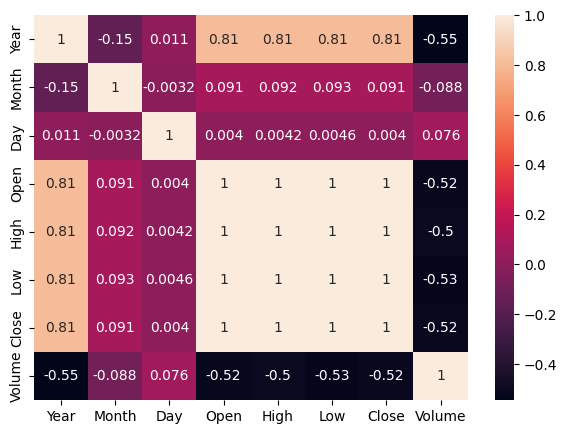

In [26]:
# Compute pairwise correlation of columns, excluding NA/null values
plt.figure(figsize=(7,5))
sns.heatmap(standard_scaled_data_df_with_date.corr(),annot=True,)
plt.show()

    .Domain Knowledge: Consider the domain context and the actual meaning of the features. 
     Sometimes, correlated features might make sense if they represent different aspects of the same underlying phenomenon.



# Data split 

In [27]:

data=standard_scaled_data_df_with_date.copy()
X =data.drop('Close',axis=1).copy()
Y =data['Close'].copy()



In [28]:
X

,Year,Month,Day,Open,High,Low,Volume
0,2019,10,15,-1.227029,-1.253682,-1.214092,0.118314
1,2020,7,30,0.633355,0.640377,0.671272,-0.161739
2,2021,3,31,0.963687,1.012491,1.032242,-0.969262
3,2020,4,15,-0.006427,0.141138,0.050209,1.646146
4,2020,10,22,0.765450,0.703892,0.714002,-0.060509
...,...,...,...,...,...,...,...
499,2020,1,27,-0.639972,-0.636018,-0.627670,0.124528
500,2018,3,13,-0.848603,-0.879791,-0.891664,1.478687
501,2020,2,11,-0.377294,-0.390842,-0.354539,-0.639076
502,2019,11,6,-1.185737,-1.209810,-1.152804,-0.986112


In [29]:
Y

0     -1.218934
1      0.683328
2      1.021781
3      0.126005
4      0.677949
         ...   
499   -0.665574
500   -0.920404
501   -0.374784
502   -1.177972
503   -1.375513
Name: Close, Length: 504, dtype: float64

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=345)

In [31]:
#X_train,Y_train
X_train.to_csv('D:/DS NOTE/PROJECT/files/train/raw/X_train.csv',index=False)
Y_train.to_csv('D:/DS NOTE/PROJECT/files/train/raw/Y_train.csv',index=False)
#X_test,Y_test
X_test.to_csv('D:/DS NOTE/PROJECT/files/evaluate/raw/X_test.csv',index=False)
Y_test.to_csv('D:/DS NOTE/PROJECT/files/evaluate/raw/y_test.csv',index=False)

# Model train

In [32]:
# RandomForest
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)

RandomForestRegressor()

In [33]:
print('Train score:',rf.score(X_train,Y_train)* 100)


Train score: 99.95901480823643


In [34]:
jb.dump(rf,'D:/DS NOTE/PROJECT/files/train/model/rf.pkl')


['D:/DS NOTE/PROJECT/files/train/model/rf.pkl']

# Model Hyperparameter tunning

In [35]:
rf.estimators_

[DecisionTreeRegressor(max_features=1.0, random_state=960595990),
 DecisionTreeRegressor(max_features=1.0, random_state=2046391550),
 DecisionTreeRegressor(max_features=1.0, random_state=1484150194),
 DecisionTreeRegressor(max_features=1.0, random_state=704066894),
 DecisionTreeRegressor(max_features=1.0, random_state=248866459),
 DecisionTreeRegressor(max_features=1.0, random_state=1656678094),
 DecisionTreeRegressor(max_features=1.0, random_state=1092966263),
 DecisionTreeRegressor(max_features=1.0, random_state=156925596),
 DecisionTreeRegressor(max_features=1.0, random_state=2055415646),
 DecisionTreeRegressor(max_features=1.0, random_state=2057648202),
 DecisionTreeRegressor(max_features=1.0, random_state=1133010829),
 DecisionTreeRegressor(max_features=1.0, random_state=1247643634),
 DecisionTreeRegressor(max_features=1.0, random_state=271609116),
 DecisionTreeRegressor(max_features=1.0, random_state=1839655777),
 DecisionTreeRegressor(max_features=1.0, random_state=1254537912),


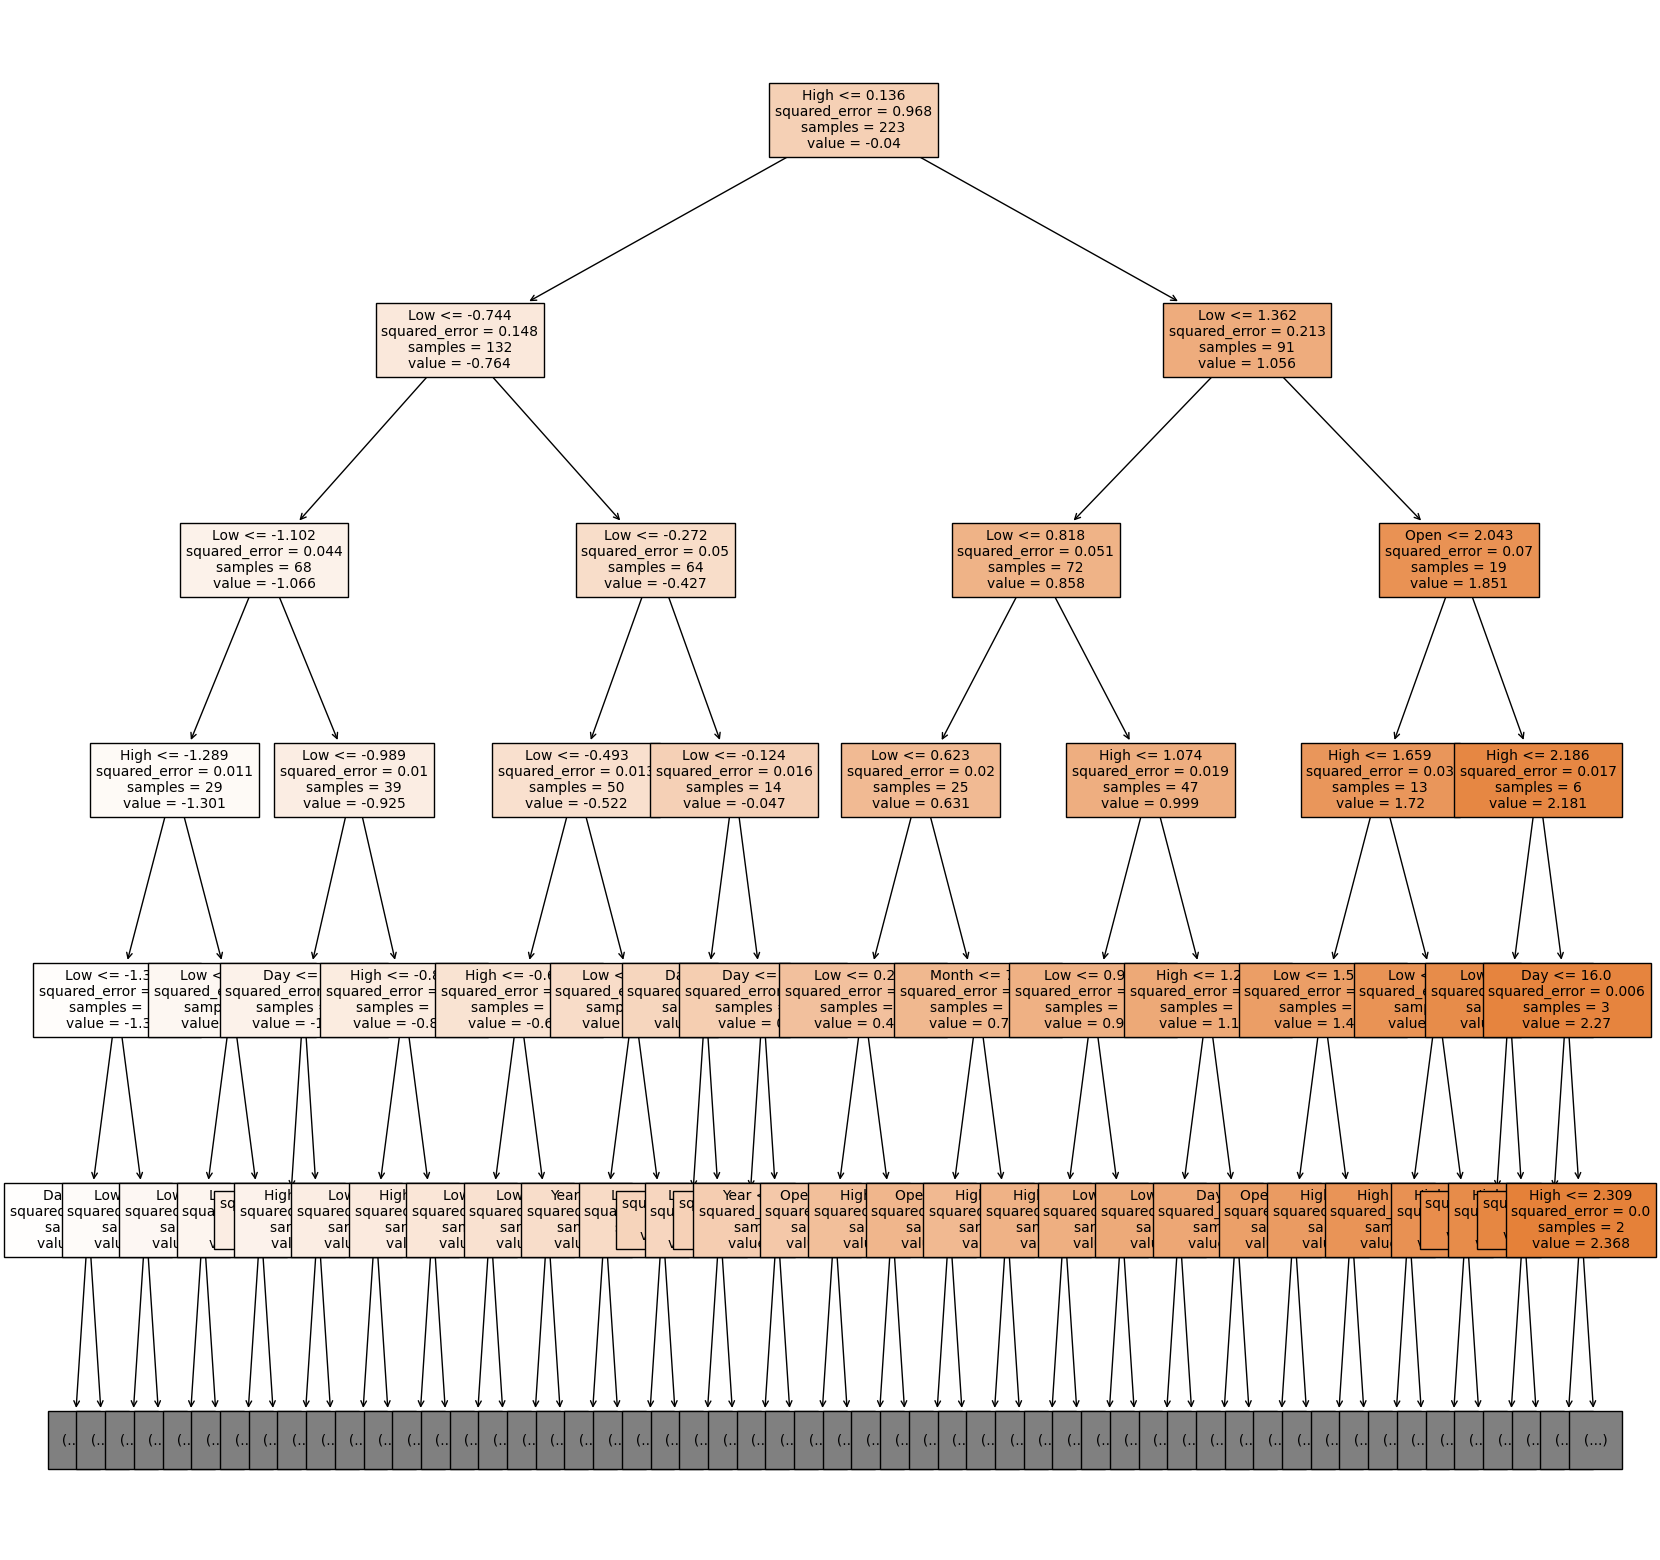

In [36]:
# plot_tree for random forest
plt.figure(figsize=(20,20))
plot_tree(rf.estimators_[0],max_depth=5,filled=True,fontsize=(10),feature_names=X.columns)
plt.show()

<BarContainer object of 7 artists>

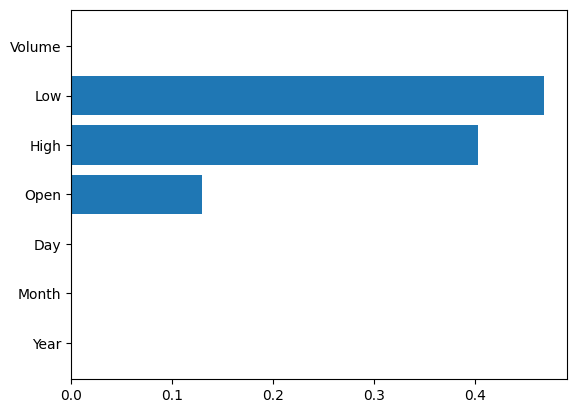

In [37]:
# feature_importances_
plt.barh(X.columns,rf.feature_importances_)

## Prediction


In [38]:
##load x test and y test 
model=jb.load('D:/DS NOTE/PROJECT/files/train/model/rf.pkl')

In [39]:
y_pred=pd.DataFrame(model.predict(X_test))
y_pred

,0
0,-0.961421
1,0.848540
2,-0.382555
3,-1.085675
4,-0.958679
...,...
147,0.952249
148,-0.644952
149,-0.439162
150,1.760360


In [40]:
print('Test score:',rf.score(X_test,Y_test)* 100)

Test score: 99.62740024784965


## Evaluation of Metrics

In [41]:
# Calculate Mean Squared Error (MSE)
MSE = mean_squared_error(Y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
RMSE = np.sqrt(MSE)

# Calculate Mean Absolute Error (MAE)
MAE = mean_absolute_error(Y_test, y_pred)

# Calculate R-squared (R2_score)
R2 = r2_score(Y_test, y_pred)
print(f'MSE= {MSE}\nRMSE = {RMSE}\nMAE = {MAE}\nR2 = {R2}')

MSE= 0.003599698432803538
RMSE = 0.05999748688739836
MAE = 0.04027750107849878
R2 = 0.9962740024784965


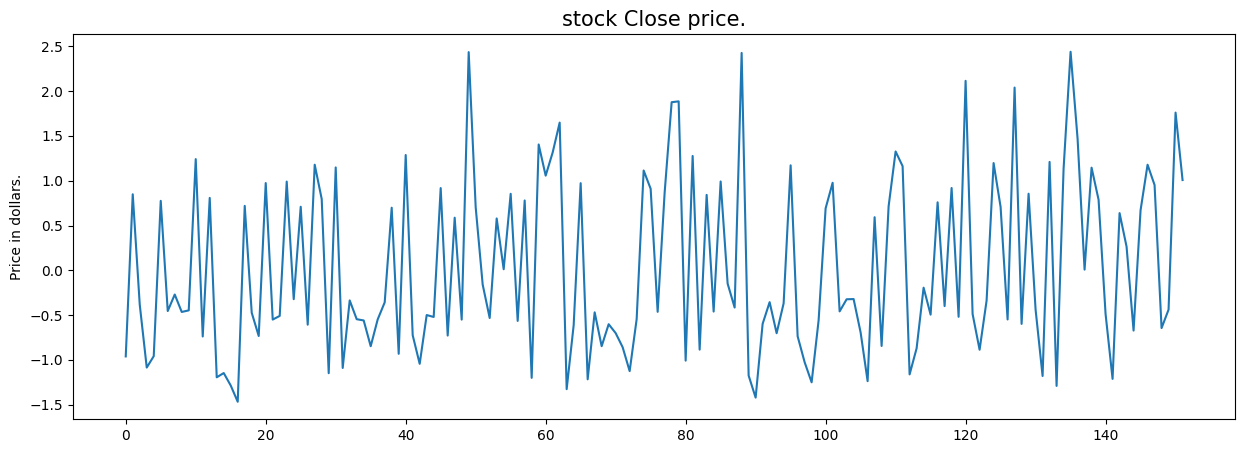

In [42]:
plt.figure(figsize=(15,5))
plt.plot(y_pred[0])
plt.title('stock Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()


# Conclusion:
    In this project, we aimed to develop an accurate stock price prediction model using the RandomForest algorithm. 
    After extensive data preprocessing, feature engineering, and model training, we achieved an impressive 
    accuracy score of 99.64% on the test dataset.